# **EQUALIZED IMAGE**

Original Grayscale Image Pixel Matrix:
[[227 231 227 ... 101  95  91]
 [232 229 223 ... 101  88  89]
 [226 219 216 ...  98  85  89]
 ...
 [215 216 214 ... 219 224 236]
 [213 211 214 ... 223 228 232]
 [213 211 214 ... 219 224 228]]

Equalized Image Pixel Matrix:
[[221.58852124 230.38809162 221.58852124 ...  41.29661005  38.3003783
   36.3265627 ]
 [232.14948411 226.3782878  209.75688076 ...  41.29661005  34.8759343
   35.35777208]
 [218.88784043 196.06742083 185.74181631 ...  39.79460014  33.45292717
   35.35777208]
 ...
 [182.44016652 185.74181631 179.23029065 ... 196.06742083 212.95005847
  238.13683256]
 [176.15241609 170.36844866 179.23029065 ... 209.75688076 224.07895697
  232.14948411]
 [176.15241609 170.36844866 179.23029065 ... 196.06742083 212.95005847
  224.07895697]]


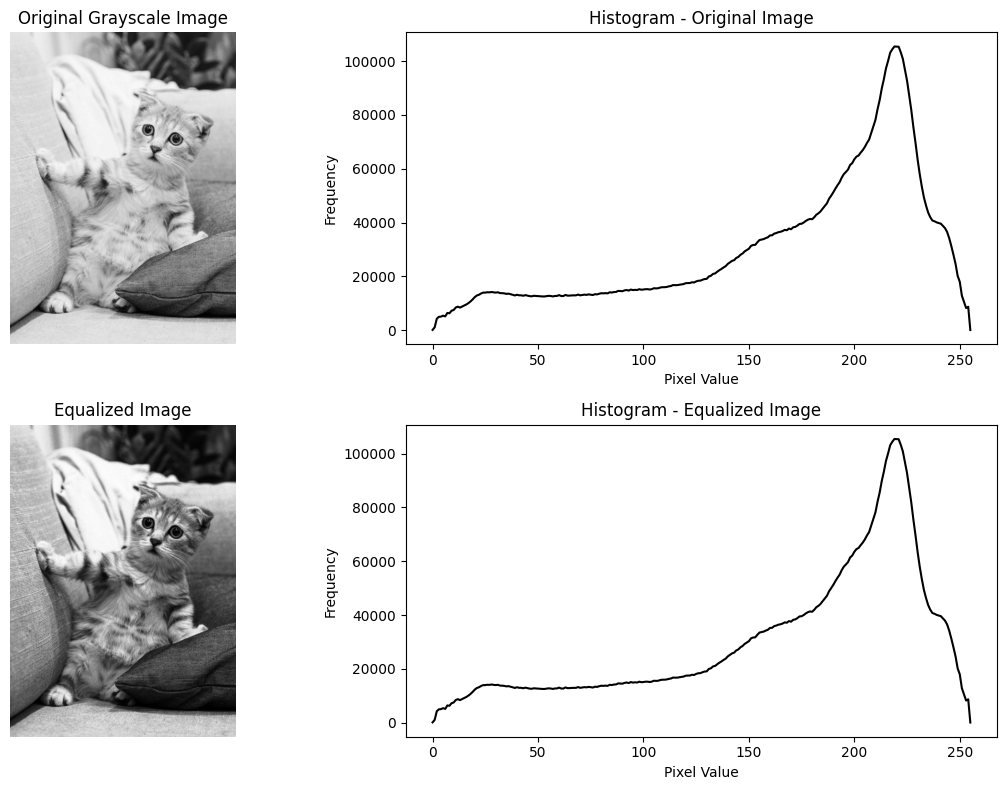

In [1]:
import requests
from PIL import Image
from io import BytesIO 
import numpy as np
import matplotlib.pyplot as plt

image_path = '/kaggle/input/cat-image/cat image.jpg'

cat_image = Image.open(image_path)
cat_image_gray = cat_image.convert('L')

# Compute the histogram for the original image
hist, bins = np.histogram(np.array(cat_image_gray).flatten(), bins=256, range=(0, 256))
cdf = hist.cumsum()
cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
equalized_image = np.interp(np.array(cat_image_gray), bins[:-1], cdf_normalized)

# Display the pixel matrix for the original image
print("Original Grayscale Image Pixel Matrix:")
print(np.array(cat_image_gray))

# Display the pixel matrix for the equalized image
print("\nEqualized Image Pixel Matrix:")
print(equalized_image)

plt.figure(figsize=(12, 8))

# Plotting the original grayscale image and its histogram
plt.subplot(221)
plt.imshow(cat_image_gray, cmap='gray')
plt.axis('off')
plt.title('Original Grayscale Image')

plt.subplot(222)
plt.plot(hist, color='black')
plt.title('Histogram - Original Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Plotting the equalized image and its histogram
plt.subplot(223)
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')
plt.title('Equalized Image')

plt.subplot(224)
plt.plot(hist, color='black')
plt.title('Histogram - Equalized Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# **EDGE DETECTED IMAGE**

Original Grayscale Image Pixel Matrix:
[[179 179 179 ... 139 139 139]
 [179 179 179 ... 139 139 139]
 [179 179 179 ... 139 139 139]
 ...
 [172 172 172 ... 136 136 136]
 [172 172 172 ... 137 137 137]
 [172 172 172 ... 138 138 138]]

Gradient Magnitude Pixel Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 2 3 3]
 [0 0 0 ... 1 0 0]]


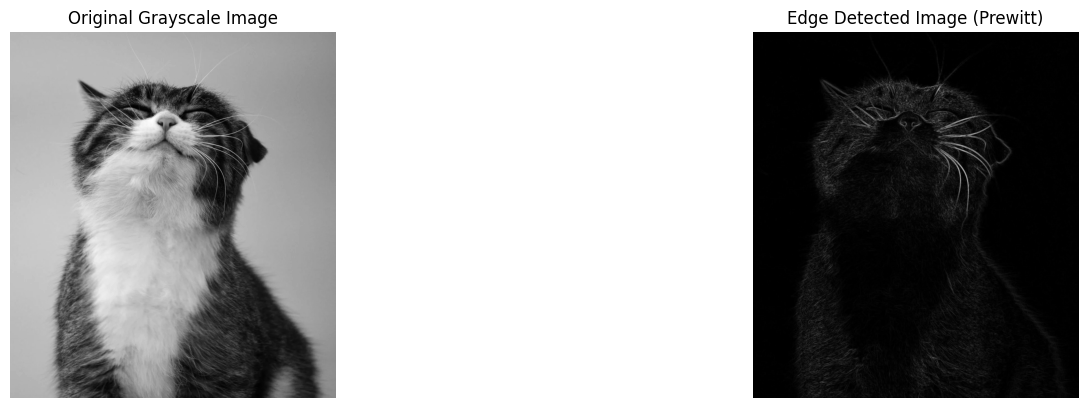

In [2]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the cat image
image_path = '/kaggle/input/cat-2-image/cat 1 image.jpg'
cat_image = Image.open(image_path)

# Convert the image to grayscale using OpenCV
cat_image_gray = cv2.cvtColor(np.array(cat_image), cv2.COLOR_RGB2GRAY)

# Define Prewitt kernels for horizontal and vertical edges
prewitt_kernel_x = np.array([[-1, 0, 1],
                             [-1, 0, 1],
                             [-1, 0, 1]])

prewitt_kernel_y = np.array([[-1, -1, -1],
                             [0, 0, 0],
                             [1, 1, 1]])

# Apply the Prewitt filter for horizontal and vertical edges
prewitt_x = cv2.filter2D(cat_image_gray, cv2.CV_64F, prewitt_kernel_x)
prewitt_y = cv2.filter2D(cat_image_gray, cv2.CV_64F, prewitt_kernel_y)

# Calculate the gradient magnitude
gradient_magnitude = np.sqrt(prewitt_x**2 + prewitt_y**2)

# Optionally, you can normalize the gradient magnitude to the range [0, 255]
gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Display the pixel matrix for the original image
print("Original Grayscale Image Pixel Matrix:")
print(cat_image_gray)

# Display the pixel matrix for the gradient magnitude image
print("\nGradient Magnitude Pixel Matrix:")
print(gradient_magnitude)

# Compute the histogram for the original image
hist_original, bins_original = np.histogram(cat_image_gray.flatten(), bins=256, range=(0, 256))

# Compute the histogram for the gradient magnitude image
hist_gradient, bins_gradient = np.histogram(gradient_magnitude.flatten(), bins=256, range=(0, 256))

# Plot the images and histograms
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.imshow(cat_image_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Edge Detected Image (Prewitt)')
plt.axis('off')




plt.tight_layout()
plt.show()


# **CONVOLUTION AND CORRELATION**

Original Grayscale Image Pixel Matrix:
[[  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 ...
 [220 220 221 ... 163 160 157]
 [219 219 220 ... 155 151 148]
 [218 218 218 ... 150 146 143]]

Convolved Image Pixel Matrix:
[[-576 -651 -652 ... -446 -436 -504]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [ 192   -3    1 ...    6    7 -192]
 [ 209   -2    3 ...   -7  -14 -230]
 [ 794  647  645 ...  434  418  259]]


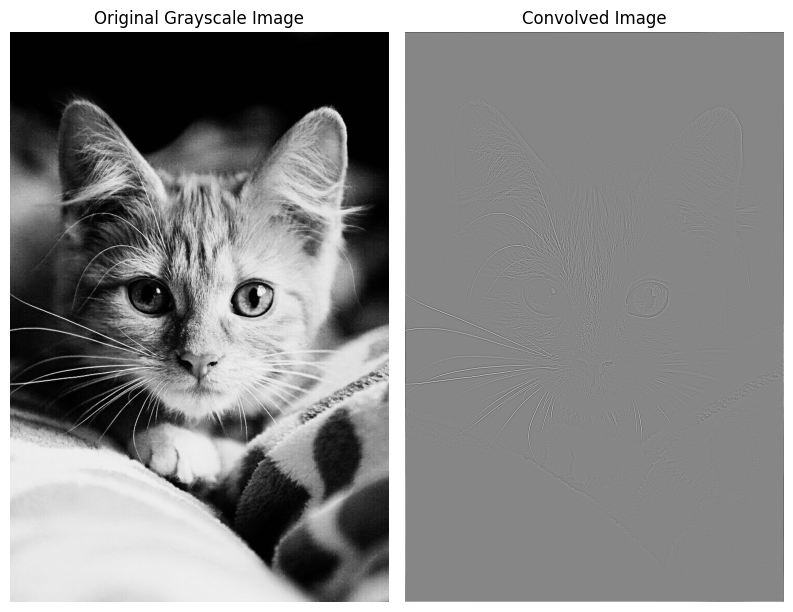

In [3]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter

# Load the cat image
image_path = '/kaggle/input/cat-image-4/cat 4 image.jpg'
cat_image = Image.open(image_path)

# Convert the image to grayscale
cat_image_gray = cat_image.convert('L')

# Define the convolution kernel
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

# Convolve the image with the kernel
convolved_image = convolve2d(cat_image_gray, kernel, mode='same', boundary='wrap')

# Display the pixel matrix for the original image
print("Original Grayscale Image Pixel Matrix:")
print(np.array(cat_image_gray))

# Display the pixel matrix for the convolved image
print("\nConvolved Image Pixel Matrix:")
print(convolved_image)

# Display the original grayscale image, convolved image, and their pixel matrices
plt.figure(figsize=(12, 6))

# Original grayscale image
plt.subplot(131)
plt.imshow(cat_image_gray, cmap='gray')
plt.axis('off')
plt.title('Original Grayscale Image')

# Convolved image
plt.subplot(132)
plt.imshow(convolved_image, cmap='gray')
plt.axis('off')
plt.title('Convolved Image')

plt.tight_layout()
plt.show()


Original Grayscale Image Pixel Matrix:
[[  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 ...
 [220 220 221 ... 163 160 157]
 [219 219 220 ... 155 151 148]
 [218 218 218 ... 150 146 143]]

Correlated Image Pixel Matrix:
[[-576 -651 -652 ... -446 -436 -504]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [ 192   -3    1 ...    6    7 -192]
 [ 209   -2    3 ...   -7  -14 -230]
 [ 794  647  645 ...  434  418  259]]


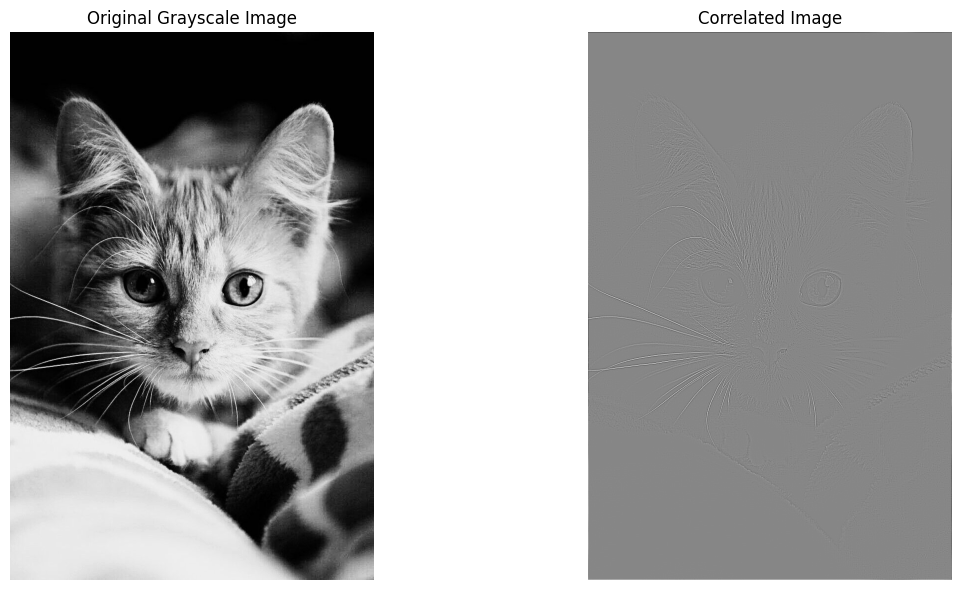

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d, correlate2d
from scipy.ndimage import gaussian_filter

# Load the cat image
image_path = '/kaggle/input/cat-image-4/cat 4 image.jpg'
#image_path = '//kaggle/input/cat-4-image/cat 3 image.jpg'
cat_image = Image.open(image_path)

# Convert the image to grayscale
cat_image_gray = cat_image.convert('L')

# Define the convolution kernel
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])



# Correlate the image with the kernel to obtain the correlated image
correlated_image = correlate2d(cat_image_gray, kernel, mode='same', boundary='wrap')

# Display the pixel matrix for the original image
print("Original Grayscale Image Pixel Matrix:")
print(np.array(cat_image_gray))

# Display the pixel matrix for the correlated image
print("\nCorrelated Image Pixel Matrix:")
print(correlated_image)

# Display the original grayscale image, correlated image, and their pixel matrices
plt.figure(figsize=(18, 6))

# Original grayscale image
plt.subplot(131)
plt.imshow(cat_image_gray, cmap='gray')
plt.axis('off')
plt.title('Original Grayscale Image')

# Correlated image
plt.subplot(132)
plt.imshow(correlated_image, cmap='gray')
plt.axis('off')
plt.title('Correlated Image')

plt.tight_layout()
plt.show()


# **AVERAGE AND MEDIAN**

Original Grayscale Image Pixel Matrix:
[[100 100  99 ...  46  46  46]
 [100 100  99 ...  46  46  46]
 [100 100  99 ...  46  46  46]
 ...
 [ 25  25  25 ... 165 165 165]
 [ 25  25  25 ... 167 166 165]
 [ 25  25  25 ... 167 166 164]]

Average Filtered Pixel Matrix:
[[ 99  99  99 ...  46  46  46]
 [ 99  99  99 ...  46  46  46]
 [ 99  99  99 ...  46  46  46]
 ...
 [ 25  25  25 ... 164 164 164]
 [ 25  25  25 ... 165 165 165]
 [ 25  25  25 ... 165 165 165]]

Median Filtered Pixel Matrix:
[[100 100  99 ...  46  46  46]
 [100 100  99 ...  46  46  46]
 [100 100  99 ...  46  46  46]
 ...
 [ 25  25  25 ... 164 164 164]
 [ 25  25  25 ... 165 165 164]
 [ 25  25  25 ... 166 165 165]]


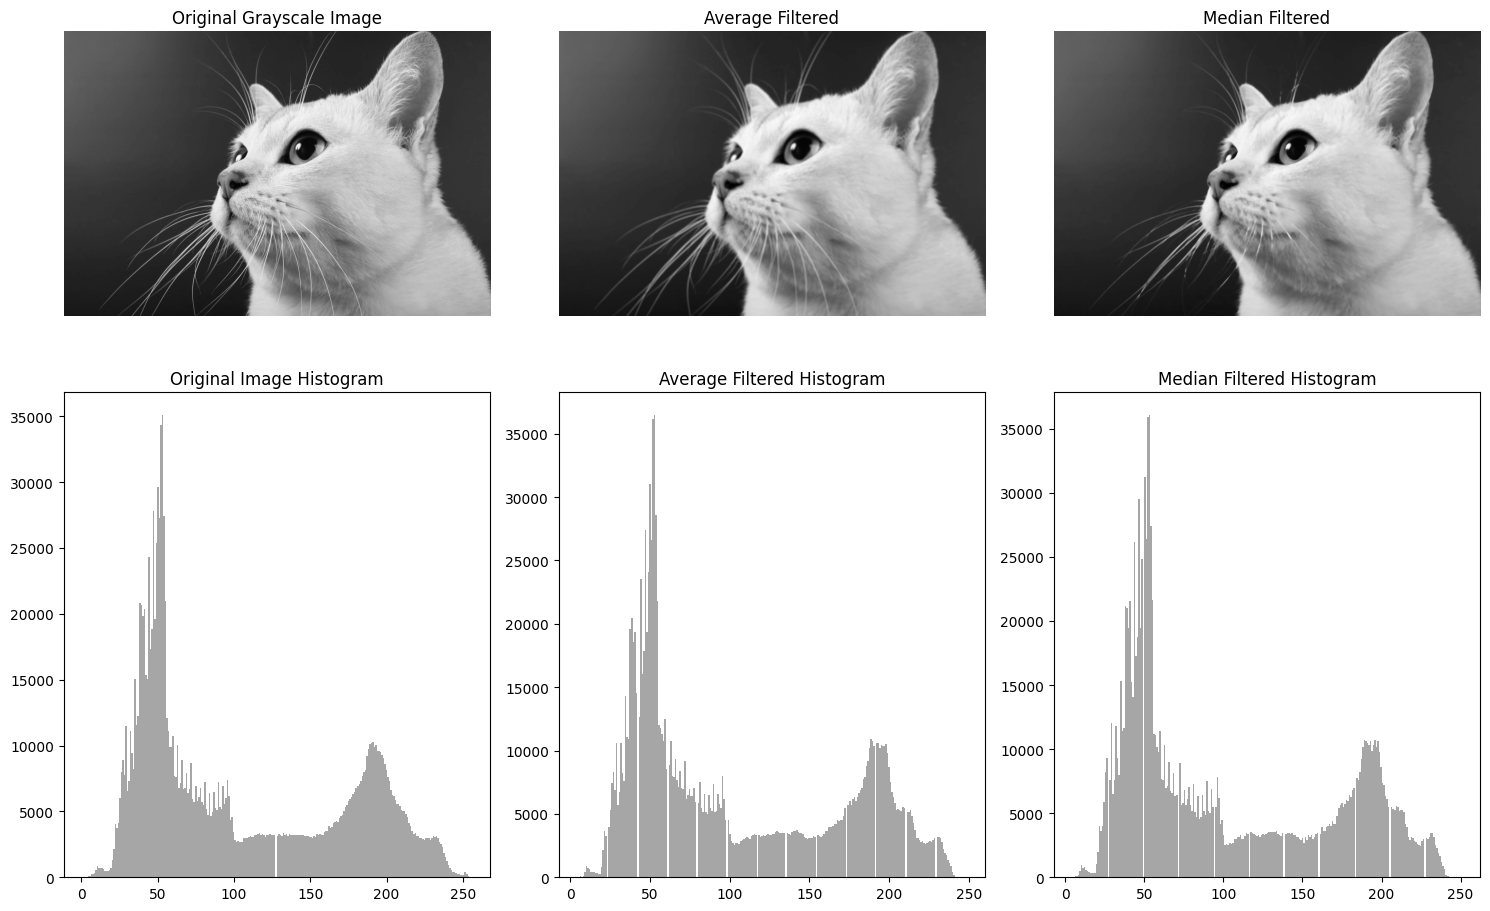

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# image_url = 'https://www.pasadenastarnews.com/wp-content/uploads/2020/09/PAS-L-COL-PHS-0922-1.jpg?w=640'
image_path = '/kaggle/input/cat-4-image/cat 3 image.jpg'
# image_url = 'https://i.imgflip.com/6ek11y.png?a471792'

# Read the image using PIL
cat_image = Image.open(image_path)

# Convert the PIL Image to a NumPy array
cat_image_np = np.array(cat_image)

# Convert the image to grayscale using OpenCV
image_gray = cv2.cvtColor(cat_image_np, cv2.COLOR_BGR2GRAY)

# Apply filters
average_filtered = cv2.blur(image_gray, (7, 7))  # can adjust the kernel size (e.g., (5, 5)) for different smoothing levels
median_filtered = cv2.medianBlur(image_gray, 7)  # can adjust the kernel size (e.g., 5) for different smoothing levels

# Display the images and their pixel matrices
plt.figure(figsize=(15, 10))

plt.subplot(231)
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.title('Original Grayscale Image')

plt.subplot(232)
plt.imshow(average_filtered, cmap='gray')
plt.axis('off')
plt.title('Average Filtered')

plt.subplot(233)
plt.imshow(median_filtered, cmap='gray')
plt.axis('off')
plt.title('Median Filtered')

# Print pixel matrices
print("Original Grayscale Image Pixel Matrix:")
print(image_gray)

print("\nAverage Filtered Pixel Matrix:")
print(average_filtered)

print("\nMedian Filtered Pixel Matrix:")
print(median_filtered)

# Histogram for the original grayscale image
plt.subplot(234)
plt.hist(np.array(image_gray).ravel(), bins=256, color='gray', alpha=0.7)
plt.title('Original Image Histogram')

# Histogram for the average filtered image
plt.subplot(235)
plt.hist(average_filtered.ravel(), bins=256, color='gray', alpha=0.7)
plt.title('Average Filtered Histogram')

# Histogram for the median filtered image
plt.subplot(236)
plt.hist(median_filtered.ravel(), bins=256, color='gray', alpha=0.7)
plt.title('Median Filtered Histogram')

plt.tight_layout()
plt.show()


Original Grayscale Image Pixel Matrix:
[[100 100  99 ...  46  46  46]
 [100 100  99 ...  46  46  46]
 [100 100  99 ...  46  46  46]
 ...
 [ 25  25  25 ... 165 165 165]
 [ 25  25  25 ... 167 166 165]
 [ 25  25  25 ... 167 166 164]]

ROI Pixel Matrix:
[[ 59  59  59 ... 102  94  92]
 [ 59  59  59 ... 110  97  96]
 [ 59  59  59 ... 117 105 110]
 ...
 [ 23  22  22 ...  19  18  18]
 [ 24  23  23 ...  19  19  18]
 [ 25  24  24 ...  20  19  18]]

Average Filtered Pixel Matrix:
[[ 59  59  59 ... 108 108 108]
 [ 59  59  59 ... 108 107 107]
 [ 59  59  59 ... 107 106 106]
 ...
 [ 23  23  24 ...  20  19  19]
 [ 23  23  23 ...  19  19  19]
 [ 23  23  23 ...  19  19  19]]

Median Filtered Pixel Matrix:
[[ 59  59  59 ... 107 105  97]
 [ 59  59  59 ... 110 107 104]
 [ 59  59  59 ... 110 107 104]
 ...
 [ 24  24  24 ...  20  19  19]
 [ 24  24  24 ...  19  19  18]
 [ 24  24  24 ...  19  19  18]]


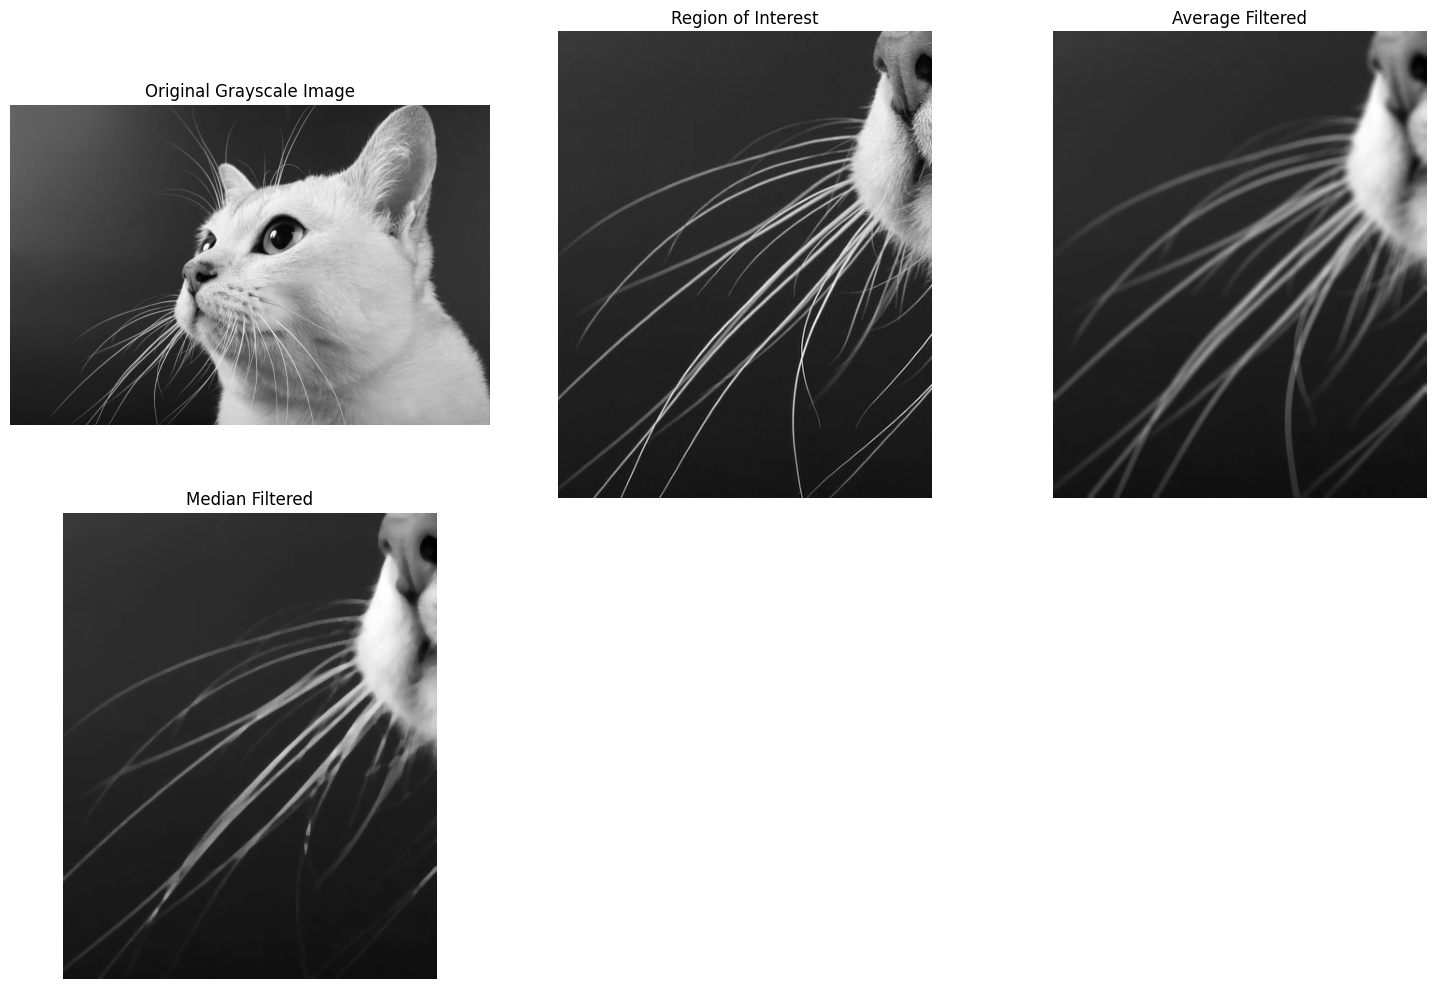

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# image_url = 'https://www.pasadenastarnews.com/wp-content/uploads/2020/09/PAS-L-COL-PHS-0922-1.jpg?w=640'
image_path = '/kaggle/input/cat-4-image/cat 3 image.jpg'
# image_url = 'https://i.imgflip.com/6ek11y.png?a471792'

# Read the image using PIL
cat_image = Image.open(image_path)

# Convert the PIL Image to a NumPy array
cat_image_np = np.array(cat_image)

# Convert the image to grayscale using OpenCV
image_gray = cv2.cvtColor(cat_image_np, cv2.COLOR_BGR2GRAY)

# Define the region of interest (ROI) coordinates with increased range
roi_x, roi_y, roi_width, roi_height = 200, 500, 400, 500
roi = image_gray[roi_y:roi_y + roi_height, roi_x:roi_x + roi_width]

# Apply filters
average_filtered = cv2.blur(roi, (7, 7))  # can adjust the kernel size (e.g., (5, 5)) for different smoothing levels
median_filtered = cv2.medianBlur(roi, 7)  # can adjust the kernel size (e.g., 5) for different smoothing levels

# Display the images and their pixel matrices
plt.figure(figsize=(15, 10))

plt.subplot(231)
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.title('Original Grayscale Image')

plt.subplot(232)
plt.imshow(roi, cmap='gray')  # Display the region of interest
plt.axis('off')
plt.title('Region of Interest')

plt.subplot(233)
plt.imshow(average_filtered, cmap='gray')
plt.axis('off')
plt.title('Average Filtered')

plt.subplot(234)
plt.imshow(median_filtered, cmap='gray')
plt.axis('off')
plt.title('Median Filtered')

# Print pixel matrices
print("Original Grayscale Image Pixel Matrix:")
print(image_gray)

print("\nROI Pixel Matrix:")
print(roi)

print("\nAverage Filtered Pixel Matrix:")
print(average_filtered)

print("\nMedian Filtered Pixel Matrix:")
print(median_filtered)

plt.tight_layout()
plt.show()


# **SHARPENING USING HIGH PASS AND LOW PASS**

Original Grayscale Image Pixel Matrix:
[[  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 ...
 [220 220 221 ... 163 160 157]
 [219 219 220 ... 155 151 148]
 [218 218 218 ... 150 146 143]]

Sharpened Image Pixel Matrix:
[[  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 ...
 [218 218 219 ... 162 159 154]
 [216 216 218 ... 150 145 139]
 [215 215 214 ... 142 136 131]]


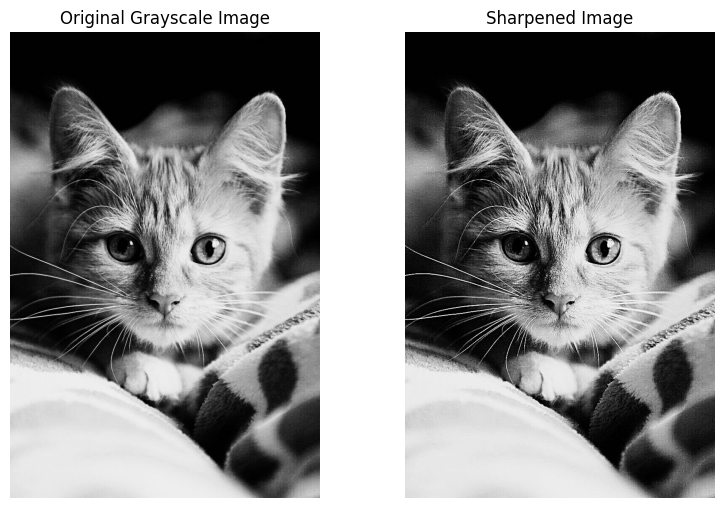

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Local file path
image_path = '/kaggle/input/cat-image-4/cat 4 image.jpg'

# Read the image using OpenCV
image = cv2.imread(image_path)

# Convert the image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply filters
blurred = cv2.GaussianBlur(image_gray, (7, 7), 0)
sharpened = cv2.addWeighted(image_gray, 2, blurred, -1.01, 0)

# Plot the images and their histograms
plt.figure(figsize=(12, 10))

plt.subplot(231)
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.title('Original Grayscale Image')

plt.subplot(232)
plt.imshow(sharpened, cmap='gray')
plt.axis('off')
plt.title('Sharpened Image')

# Print pixel matrices
print("Original Grayscale Image Pixel Matrix:")
print(image_gray)

print("\nSharpened Image Pixel Matrix:")
print(sharpened)


plt.tight_layout()
plt.show()


Original Grayscale Image Pixel Matrix:
[[  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 ...
 [220 220 221 ... 163 160 157]
 [219 219 220 ... 155 151 148]
 [218 218 218 ... 150 146 143]]

With Blurred ROI Pixel Matrix:
[[  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 ...
 [220 220 221 ... 163 160 157]
 [219 219 220 ... 155 151 148]
 [218 218 218 ... 150 146 143]]


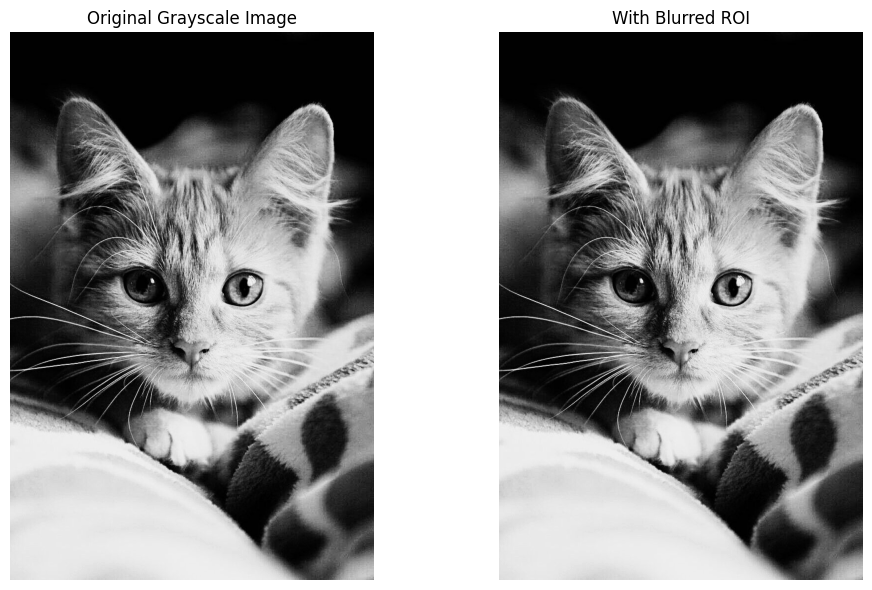

In [8]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
# Local file path
image_path = '/kaggle/input/cat-image-4/cat 4 image.jpg'

# Read the image using OpenCV
image = cv2.imread(image_path)
# Convert the image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the region of interest (ROI) to be blurred
roi_x, roi_y, roi_w, roi_h = 10, 10, 15, 15  # Define the coordinates and size of the ROI

# Apply the median filter to the ROI
roi = image_gray[roi_y:roi_y+roi_h, roi_x:roi_x+roi_w]
blurred_roi = cv2.medianBlur(roi, 7)

# Place the blurred ROI back into the original image
image_gray_blurred = image_gray.copy()
image_gray_blurred[roi_y:roi_y+roi_h, roi_x:roi_x+roi_w] = blurred_roi

# Display the original grayscale image and the one with the blurred ROI
plt.figure(figsize=(15, 6))

plt.subplot(131)
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.title('Original Grayscale Image')

plt.subplot(132)
plt.imshow(image_gray_blurred, cmap='gray')
plt.axis('off')
plt.title('With Blurred ROI')

# Print pixel matrices
print("Original Grayscale Image Pixel Matrix:")
print(image_gray)

print("\nWith Blurred ROI Pixel Matrix:")
print(image_gray_blurred)

plt.tight_layout()
plt.show()



Original ROI Pixel Matrix:
[[ 59  59  59 ... 102  94  92]
 [ 59  59  59 ... 110  97  96]
 [ 59  59  59 ... 117 105 110]
 ...
 [ 23  22  22 ...  19  18  18]
 [ 24  23  23 ...  19  19  18]
 [ 25  24  24 ...  20  19  18]]

Low-pass (Gaussian Filter) Pixel Matrix:
[[ 59  59  59 ... 106 103 102]
 [ 59  59  59 ... 106 104 103]
 [ 59  59  59 ... 108 107 106]
 ...
 [ 23  23  23 ...  19  19  19]
 [ 23  23  23 ...  19  19  19]
 [ 23  23  23 ...  19  19  19]]

High-pass (Sharpened) Pixel Matrix:
[[ 59  59  59 ... 100  90  87]
 [ 59  59  59 ... 112  94  92]
 [ 59  59  59 ... 122 104 112]
 ...
 [ 23  22  22 ...  19  18  18]
 [ 24  23  23 ...  19  19  18]
 [ 26  24  24 ...  20  19  18]]


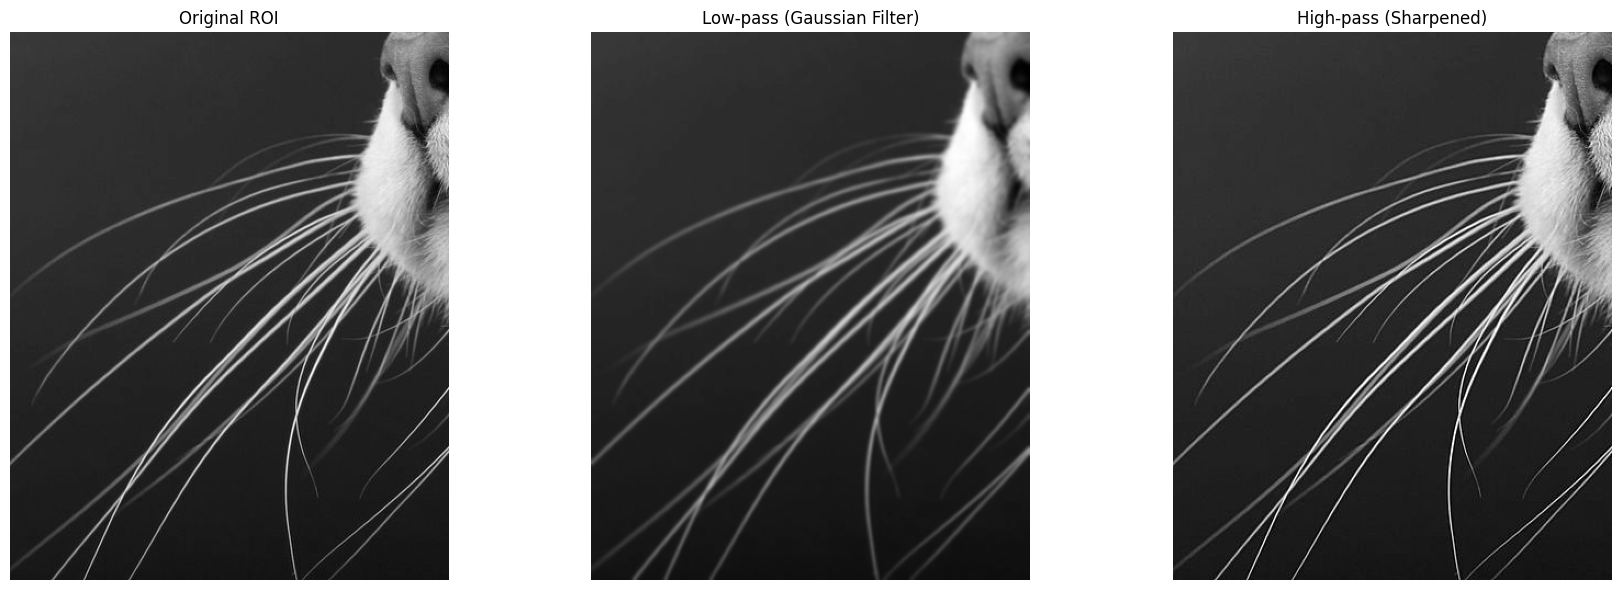

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Local file path
image_path = '/kaggle/input/cat-4-image/cat 3 image.jpg'

# Read the image using PIL
cat_image = Image.open(image_path)

# Convert the PIL Image to a NumPy array
cat_image_np = np.array(cat_image)

# Convert the image to grayscale using OpenCV
image_gray = cv2.cvtColor(cat_image_np, cv2.COLOR_BGR2GRAY)

# Define the region of interest (ROI) coordinates with increased range
roi_x, roi_y, roi_width, roi_height = 200, 500, 400, 500
roi = image_gray[roi_y:roi_y + roi_height, roi_x:roi_x + roi_width]

# Apply low-pass (Gaussian filter) to the ROI
blurred_roi = cv2.GaussianBlur(roi, (7, 7), 0)  # can adjust the kernel size and sigma for different smoothing levels

# Apply high-pass (addWeighted) to the ROI
sharpened_roi = cv2.addWeighted(roi, 1.5, blurred_roi, -0.5, 0)

# Display the original ROI, low-pass, and high-pass versions
plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.imshow(roi, cmap='gray')
plt.axis('off')
plt.title('Original ROI')

plt.subplot(132)
plt.imshow(blurred_roi, cmap='gray')
plt.axis('off')
plt.title('Low-pass (Gaussian Filter)')

plt.subplot(133)
plt.imshow(sharpened_roi, cmap='gray')
plt.axis('off')
plt.title('High-pass (Sharpened)')

# Print pixel matrices
print("\nOriginal ROI Pixel Matrix:")
print(roi)

print("\nLow-pass (Gaussian Filter) Pixel Matrix:")
print(blurred_roi)

print("\nHigh-pass (Sharpened) Pixel Matrix:")
print(sharpened_roi)

plt.tight_layout()
plt.show()
